<a href="https://colab.research.google.com/github/mscholl96/mad-recime/blob/network_CVAE/network/CVAE/dataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataPath = '/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_02_11/recipes_valid_0.pkl'
import sys
sys.path.append(dataPath)

In [41]:
import glob

files = glob.glob('/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/recipes_valid*.pkl')

In [42]:
import pickle
import pandas as pd

ingredientsList = []

for filePath in files:
  with open(filePath, 'rb') as f:
      ingredientsList.append(pickle.load(f)['ingredients'])

print(len(ingredientsList))

9


In [44]:
ingredients.to_pickle('/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/ingredients_complete.pkl')

In [48]:
ingred_2k = ingredients[:2000]
len(ingred_2k)

2000

In [49]:
ingred_2k.to_pickle('/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/ingredients_2k.pkl')

In [ ]:
for df in ingredients:
    print(df)
    for unit in df['unit']:
      print(unit)
    break

   amount        unit       ingredient
0    1.00               elbow macaroni
1    1.00              american cheese
2    0.50                       celery
3    0.50                green peppers
4    3.00  tablespoon         pimentos
5    0.50                   mayonnaise
6    1.00  tablespoon          vinegar
7    0.75    teaspoon             salt
8    0.50    teaspoon    dry dill weed




tablespoon

tablespoon
teaspoon
teaspoon


In [ ]:
len(ingredients)

834840

> Progress: 99.99988027421993%

In [8]:
unitDict = {}

for index, df in enumerate(ingredients):
    print("\r> Progress: {}%".format(index*100/len(ingredients)), end='')
    for unit in df['unit']:
        # Offset by 1 so empty fields can be 0
        unitDict.setdefault(unit, len(unitDict))

> Progress: 99.99988027421993%

In [9]:
len(ingredientDict)

17936

In [11]:
with open('/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/ingredients_ingredientDict.pkl', 'wb') as f:
    pickle.dump(ingredientDict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
unitDict

{'': 3,
 'centimetre': 16,
 'cup': 0,
 'drop': 13,
 'fluid ounce': 15,
 'gallon': 11,
 'gram': 7,
 'inch': 8,
 'millilitre': 6,
 'ounce': 4,
 'package': 9,
 'pinch': 10,
 'pint': 14,
 'pound-mass': 5,
 'quart': 12,
 'tablespoon': 1,
 'teaspoon': 2}

In [47]:
with open('/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/ingredients_unitDict.pkl', 'wb') as f:
    pickle.dump(unitDict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install word2vec

     |████████████████████████████████| 42 kB 779 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=156420 sha256=ec7a337c300fd013c4f9100a309d485b60808d02ed9ae418133e8d11106590eb
  Stored in directory: /root/.cache/pip/wheels/c9/c0/d4/29d797817e268124a32b6cf8beb8b8fe87b86f099d5a049e61
Successfully built word2vec


In [ ]:
from ReciMePreprocessor import ReciMePreprocessor

preproc = ReciMePreprocessor('/content/drive/MyDrive/TP2/Datasets/Recipe1M/vocab.bin')


out = preproc.preProcessInput(ingredients)

In [3]:
import pickle 
import pandas as pd

path = '/content/drive/MyDrive/TP2/Datasets/Recipe1M/2022_03_30/ingredients_complete.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)

In [36]:
for index, word in enumerate(data[0]['ingredient'].to_list()):
    print(index, word)

0 elbow macaroni
1 american cheese
2 celery
3 green peppers
4 pimentos
5 mayonnaise
6 vinegar
7 salt
8 dry dill weed


In [41]:
list_of_dicts = []

for ind in range(0,20):
    list_of_dicts.append(dict())

for element in data:
    for index, word in enumerate(element['ingredient'].to_list()):
        list_of_dicts[index][word] = list_of_dicts[index].setdefault(word, 0) + 1

In [8]:
list(list_of_dicts[0].keys()).index('chicken')

583

In [18]:
list_of_dicts[2]['chicken']

9513

In [42]:
word_list = []
for di in list_of_dicts:
    word_list.append(di['chicken'])

In [43]:
word_list

[3894,
 1098,
 570,
 574,
 577,
 548,
 451,
 437,
 404,
 296,
 196,
 135,
 141,
 78,
 51,
 29,
 21,
 4,
 7,
 2]

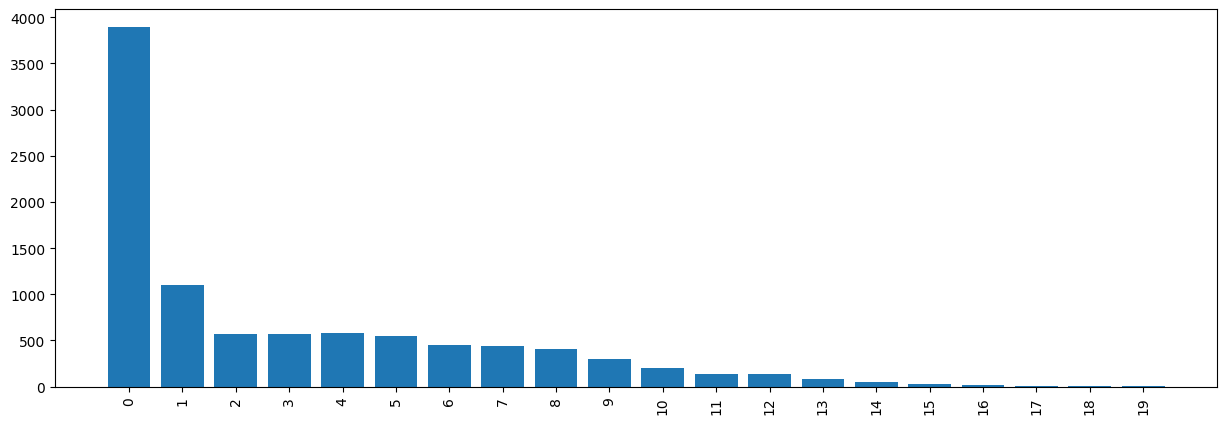

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5), dpi=100, facecolor='w')
ax = plt.bar([str(x) for x in range(0,20)], word_list, align='center')
highlight = 'chicken'
plt.xticks(rotation='vertical')
plt.show()

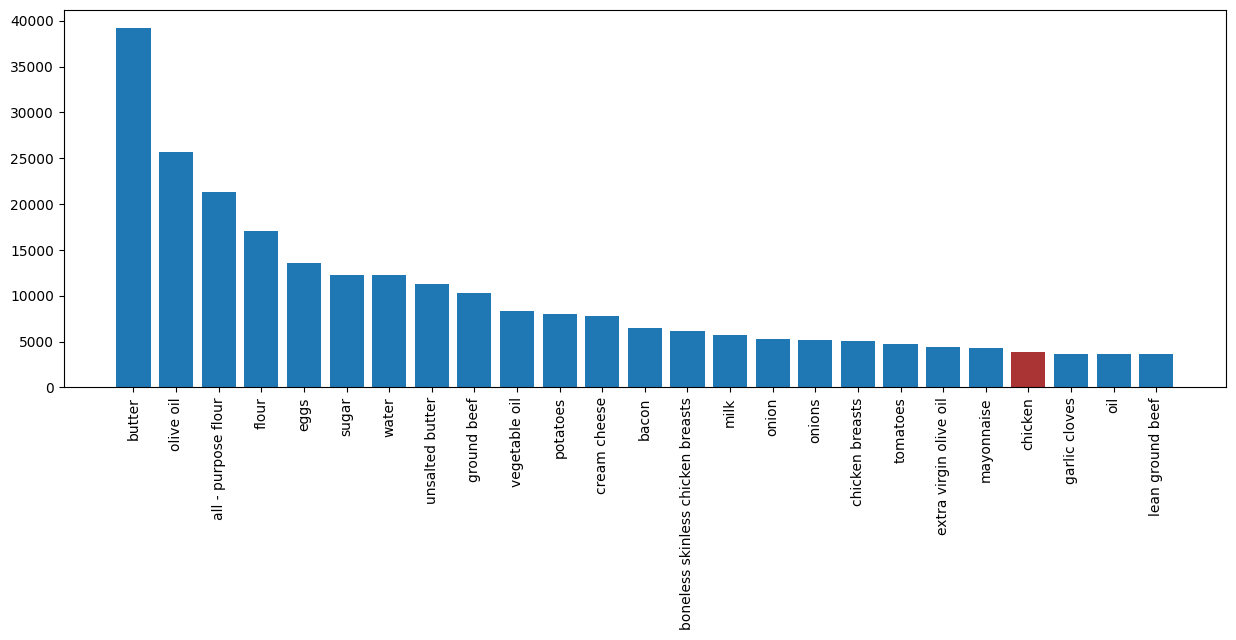

In [47]:
import matplotlib.pyplot as plt

words = sorted(list_of_dicts[0].items(), key=lambda x:x[1], reverse=True)
words_keys, words_values = zip(*words)
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
ax = plt.bar(words_keys[:25], words_values[:25], align='center')
highlight = 'chicken'
pos = words_keys.index(('chicken'))

ax.patches[pos].set_facecolor('#aa3333')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
words_keys.index(('chicken'))

130

In [20]:
words[21][1]*100/len(data)

0.4661409851855579

In [24]:
sum(words_values[:25])*100/len(data)

29.831226055016856

In [4]:
words_dict_comp = {}

for element in data:
    for word in element['ingredient']:
        words_dict_comp[word] = words_dict_comp.setdefault(word, 0) + 1

In [5]:
len(words_dict_comp)

17936

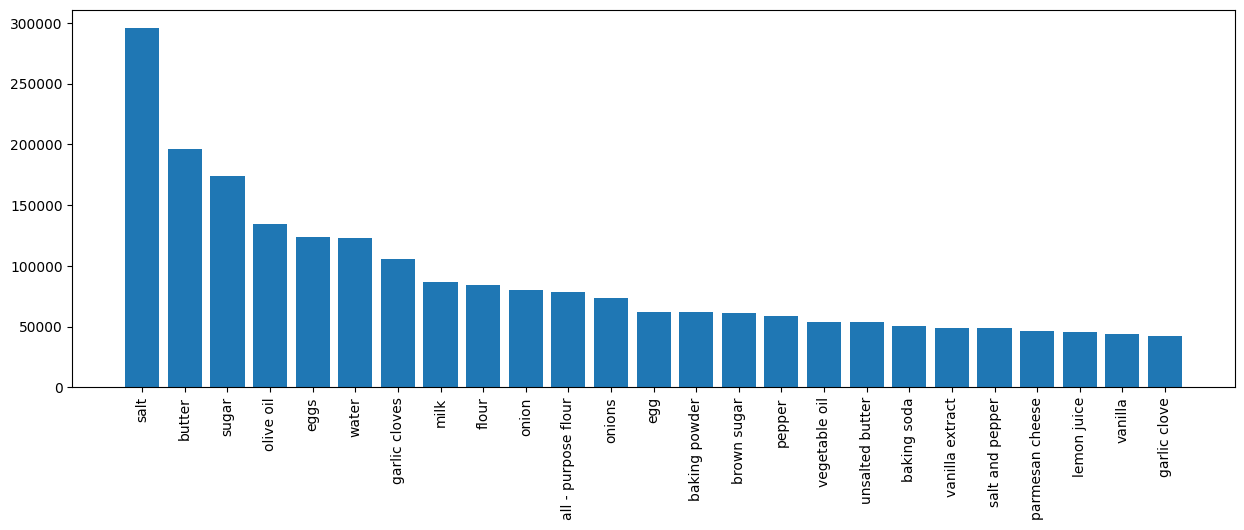

In [51]:
words_comp = sorted(words_dict_comp.items(), key=lambda x:x[1], reverse=True)
words_comp_keys, words_comp_values = zip(*words_comp)
plt.figure(figsize=(15,5), dpi=100, facecolor='w')
ax = plt.bar(words_comp_keys[:25], words_comp_values[:25], align='center')
highlight = 'chicken'
#pos = words_comp_keys.index(('chicken'))

#ax.patches[pos].set_facecolor('#aa3333')
plt.xticks(rotation='vertical')
plt.show()

In [37]:
words_comp_keys.index(('chicken'))

130

In [40]:
words_comp[130][1]*100/len(data)

1.1389366091388071